In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [2]:
A_2015 = pd.read_csv('result_2015.csv', index_col = 0)
A_2016 = pd.read_csv('result_2016.csv', index_col = 0)
A_2017 = pd.read_csv('result_2017.csv', index_col = 0)
A_2018 = pd.read_csv('result_2018.csv', index_col = 0)
A_2019 = pd.read_csv('result_2019.csv', index_col = 0)

In [3]:
A_2015 = A_2015.sort_values(by=['SQLDATEE'])

In [4]:
A_2015 = A_2015[A_2015['SQLDATEE'] >= 20150301]

In [5]:
frames = [A_2015, A_2016, A_2017, A_2018, A_2019]
Argentia = pd.concat(frames)

In [6]:
B = Argentia.groupby('SQLDATEE')

In [7]:
def agg(x):
    df_agg = x.groupby('SQLDATEE')['GoldsteinScale','NumMentions','NumSources',
                'NumArticles','AvgTone'].aggregate({"GoldsteinScale":['count', 'mean'], 
                            "NumMentions":['mean'], 
                            "NumSources":['mean'],  
                            "NumArticles":['mean'],
                            "AvgTone":['mean']}).reset_index()
    return df_agg

In [8]:
def agg2(x):
    df_agg2 = x.groupby('SQLDATEE')['GoldsteinScale','NumMentions','NumSources',
                'NumArticles','AvgTone'].aggregate({"GoldsteinScale":['count', 'mean','median','std'], 
                            "NumMentions":['mean','median','std'], 
                            "NumSources":['mean','median','std'],  
                            "NumArticles":['mean','median','std'],
                            "AvgTone":['mean','median','std']}).reset_index()
    return df_agg2

In [9]:
A = agg(Argentia)

In [10]:
A1 = agg2(Argentia)
A1.head()

SQLDATEE GoldsteinScale                            NumMentions             \
                     count      mean median       std        mean     median   
0  20150301            823  1.121016    1.9  3.993682    7.329084   8.000000   
1  20150302            911  0.475675    1.0  4.292180    7.552059   8.000000   
2  20150303            856  0.646092    1.0  3.907155    7.748390  10.000000   
3  20150304           1020  0.325689    1.0  3.986688    7.503115   8.000000   
4  20150305            976  0.205828    1.0  4.359560    7.460448   7.071429   

            NumSources                  NumArticles                      \
        std       mean median       std        mean    median       std   
0  3.989662   1.029882    1.0  0.188437    7.217724  8.000000  3.803454   
1  4.153401   1.031115    1.0  0.195735    7.457878  8.000000  4.065065   
2  3.985845   1.035002    1.0  0.231411    7.638371  9.416667  3.862195   
3  4.616531   1.066405    1.0  0.386144    7.389094  7.875000  4.480648   
4  5.712640   1.035334    1.0  0.232110    7.315760  7.000000  5.554435   

    AvgTone                      
       mean    median       std  
0 -1.533846 -1.298701  2.975408  
1 -1.959614 -1.953125  3.070564  
2 -2.197705 -2.213194  3.062183  
3 -2.913362 -2.824661  3.546033  
4 -2.615308 -2.176950  3.827452

In [765]:
A.to_csv('Average_Count_Argentina.csv')

In [12]:
df = pd.read_csv('Argentina.csv')
df['Diff'] = df['AvgTone'].diff()

## AutoRegression

In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [17]:
type(df['SQLDATEE'])

pandas.core.series.Series

In [18]:
import datetime
from datetime import datetime
df['SQLDATEE'] = df['SQLDATEE'].apply(lambda x: str(x))
df['SQLDATEE'] = df ['SQLDATEE'].apply(lambda x: datetime.strptime(x, '%Y%m%d'))

ValueError: time data '2015-03-01 00:00:00' does not match format '%Y%m%d'

In [19]:
df['SQLDATEE'].min(), df['SQLDATEE'].max()

('2015-03-01 00:00:00', '2019-06-24 00:00:00')

In [770]:
df.dropna(inplace = True)

In [771]:
df.isnull().sum()

SQLDATEE          0
Count             0
GoldsteinScale    0
NumMentions       0
NumSources        0
NumArticles       0
AvgTone           0
Diff              0
dtype: int64

In [772]:
df = df.set_index('SQLDATEE')
df.index

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-07', '2015-03-08', '2015-03-09',
               '2015-03-10', '2015-03-11',
               ...
               '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24'],
              dtype='datetime64[ns]', name='SQLDATEE', length=1576, freq=None)

AvgTone

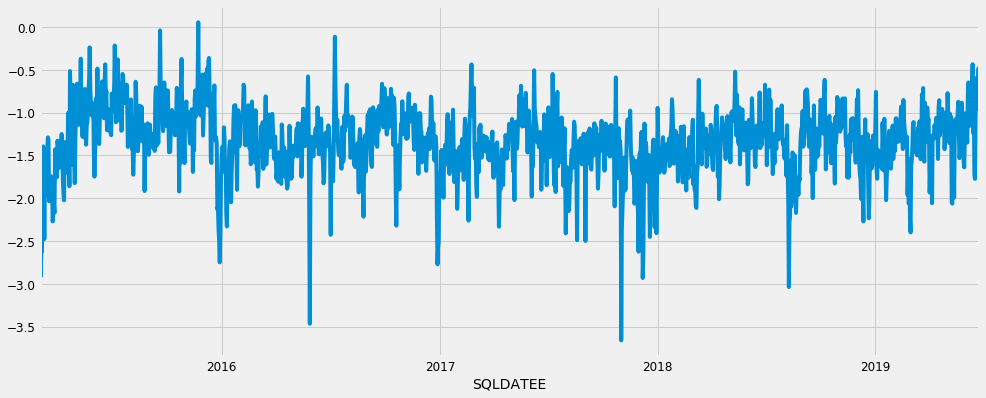

In [773]:
AvgTone = df['AvgTone']
AvgTone.plot(figsize = (15,6))

Difference

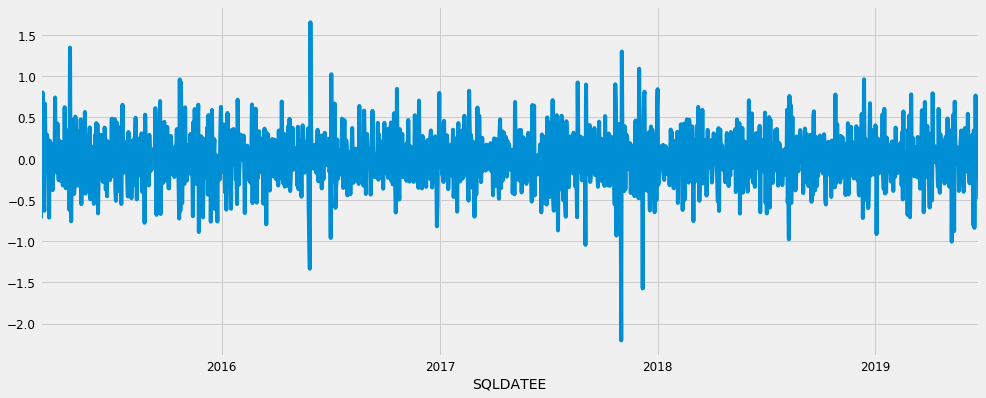

In [774]:
Diff = df['Diff']
Diff.plot(figsize = (15,6))

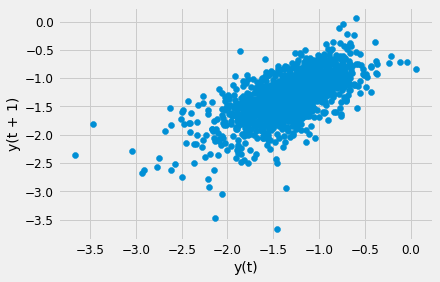

In [775]:
pd.plotting.lag_plot(df['AvgTone'])

In [776]:
df['AvgTone'].corr(df['AvgTone'].shift(1))

0.6461712099795376

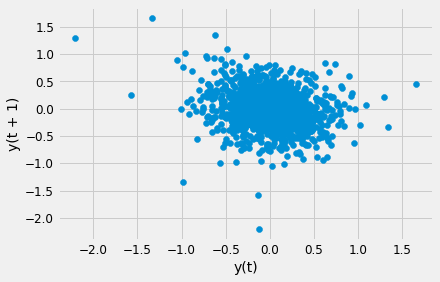

In [777]:
pd.plotting.lag_plot(df['Diff'])

In [778]:
# correlation of Difference in AvgTone is low,
# should use AvgTone as predictor. 
df['Diff'].corr(df['Diff'].shift(1))

-0.20195712010482783

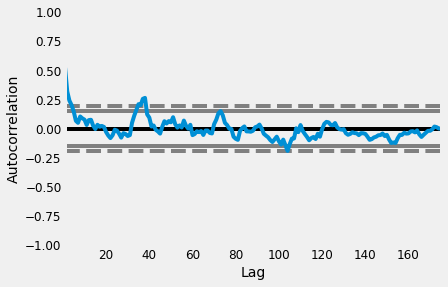

In [779]:
pd.plotting.autocorrelation_plot(AvgTone['2019':])
# p value can be range 5 to 7 

In [780]:
from statsmodels.graphics.tsaplots import plot_pacf

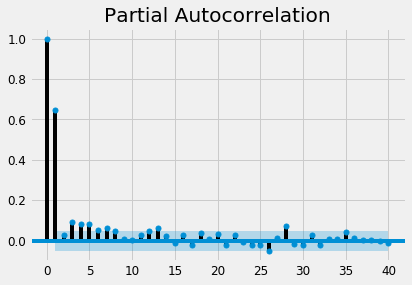

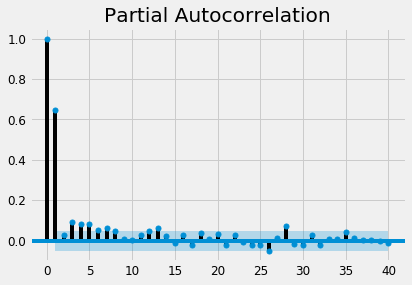

In [781]:
plot_pacf(AvgTone, lags = 40)
# q value is 2

## Additive time-series decomposition

AvgTone

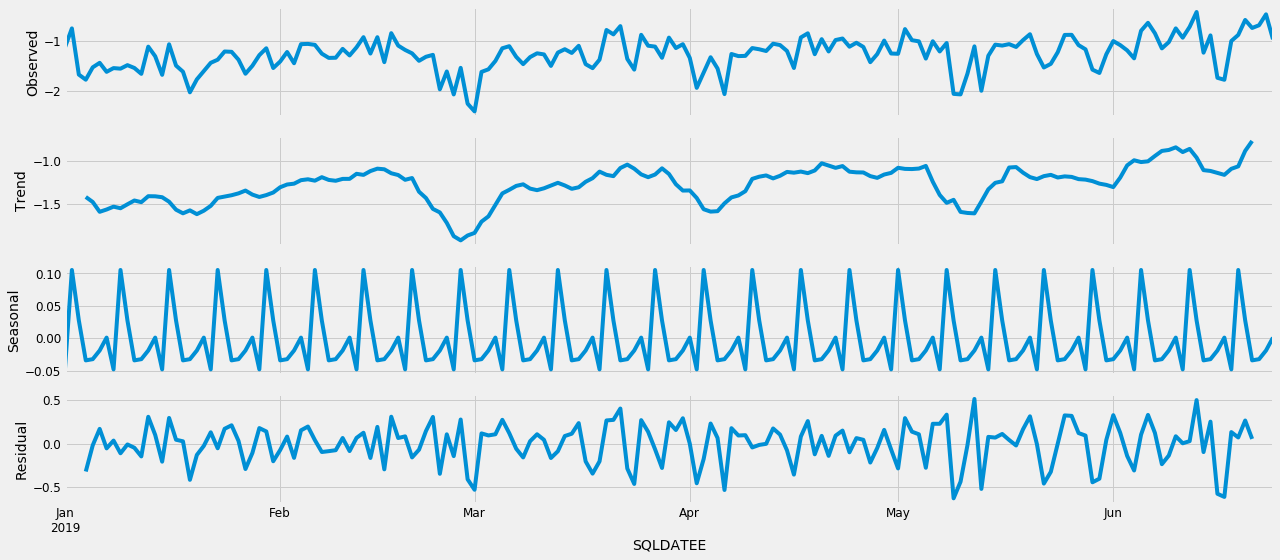

In [782]:
# check for stationarity
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(AvgTone['2019':], model='additive')
fig = decomposition.plot()
plt.show()
# there is strong seasonality, so AvgTone is not stable. 

In [783]:
# using moving average model to account for the noise and seasonality
mod = sm.tsa.statespace.SARIMAX(AvgTone,
                                order=(7, 2, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3644      0.021    -17.563      0.000      -0.405      -0.324
ar.L2         -0.3802      0.025    -15.319      0.000      -0.429      -0.332
ar.L3         -0.3155      0.027    -11.560      0.000      -0.369      -0.262
ar.L4         -0.2627      0.029     -9.167      0.000      -0.319      -0.207
ar.L5         -0.1841      0.030     -6.105      0.000      -0.243      -0.125
ar.L6         -0.1463      0.025     -5.926      0.000      -0.195      -0.098
ar.L7         -0.0916      0.027     -3.437      0.001      -0.144      -0.039
ma.L1         -1.0000      2.456     -0.407      0.684      -5.814       3.814
sigma2         0.0860      0.212      0.405      0.685      -0.330       0.502


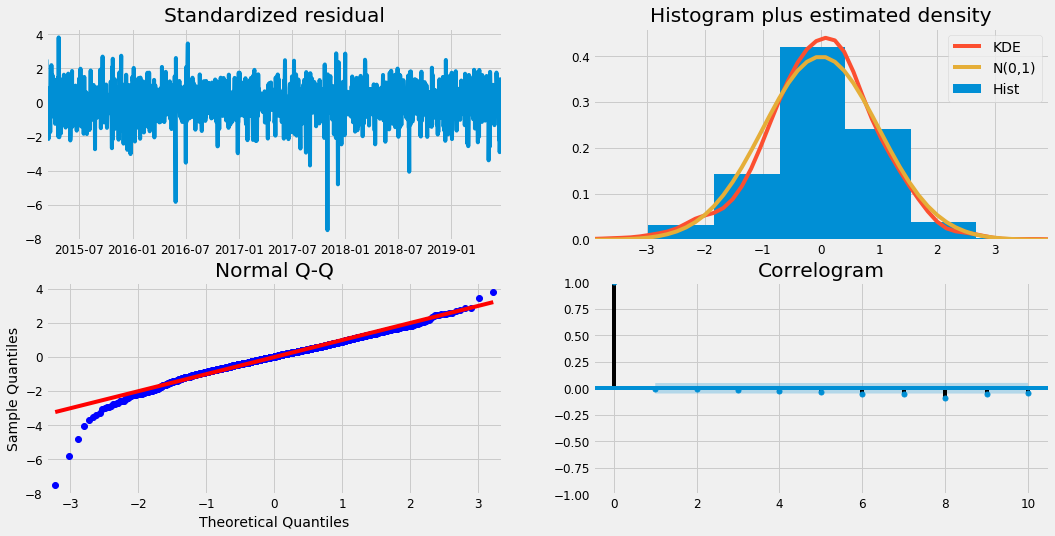

In [784]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
# From the histogram and normal qq plot, the residuals
# are normally distributed

## Validation forecasts

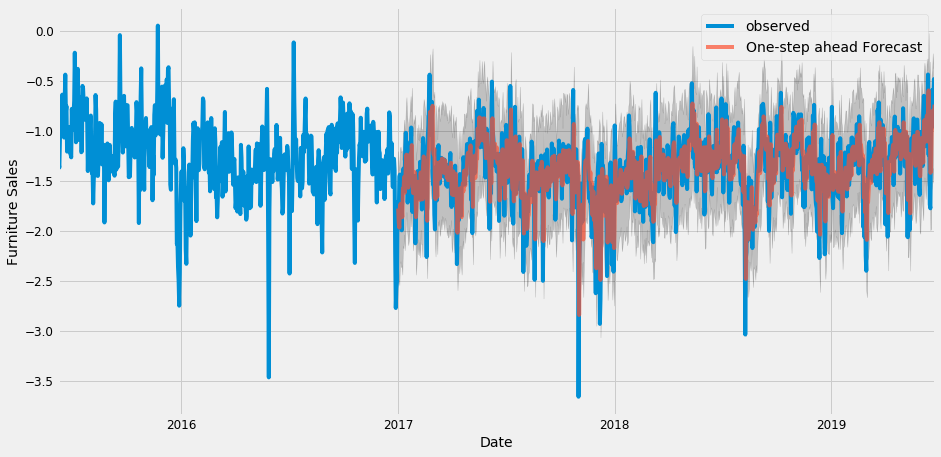

In [785]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = AvgTone['2015-06-07':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [786]:
AvgTone_forecasted = pred.predicted_mean
AvgTone_truth = AvgTone['2017-10-01':]
mse = ((AvgTone_forecasted - AvgTone_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.09


In [787]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.3


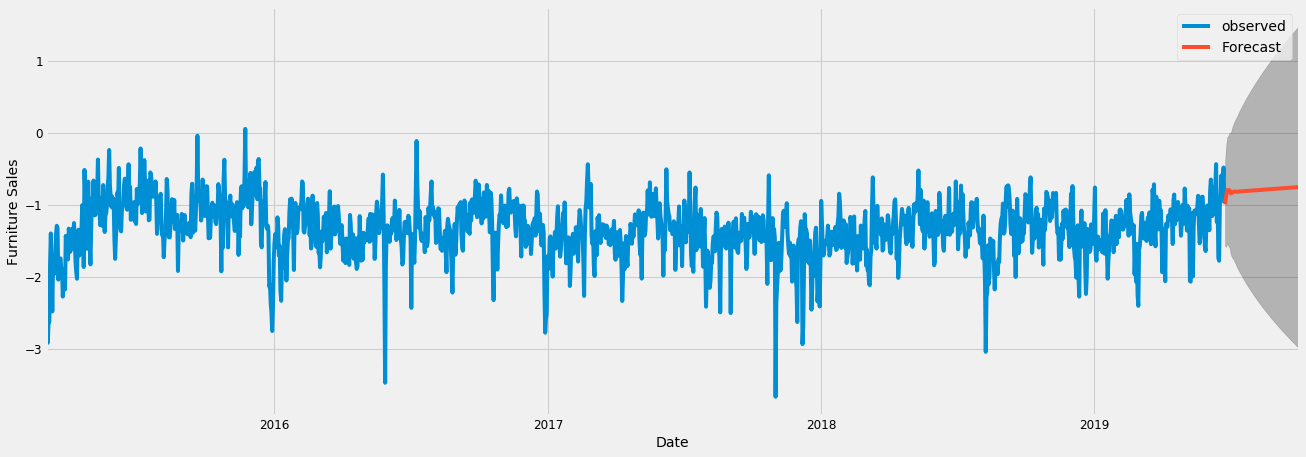

In [789]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = AvgTone.plot(label='observed', figsize=(20, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Classification

In [203]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [589]:
df['Shift1'] = df['AvgTone'].shift(1)

In [590]:
df['Shift2'] = df['AvgTone'].shift(2)

In [591]:
df['Shift3'] = df['AvgTone'].shift(3)

In [592]:
df['Shift4'] = df['AvgTone'].shift(4)

In [593]:
df['Shift5'] = df['AvgTone'].shift(5)

In [594]:
df['Shift6'] = df['AvgTone'].shift(6)

In [595]:
df['Shift7'] = df['AvgTone'].shift(7)

In [596]:
#df.fillna(df.mean(), inplace = True)
df.dropna(inplace = True)

In [597]:
df.drop(['Diff'], axis = 1, inplace = True)

In [720]:
df['median_plus'] = df['AvgTone'].median() + 1*df['AvgTone'].std()

In [721]:
df['median_minus'] = df['AvgTone'].median() - 1*df['AvgTone'].std()

In [722]:
# if AvgTone is inside its median plus/minus 1.5 standard deviation,
# then classified to 1
df['Within'] = np.where((df['AvgTone'] >= df['median_plus']) | (df['AvgTone'] <= df['median_minus']), '1', '0')

In [723]:
df.drop(['median_plus', 'median_minus'], axis =1, inplace = True)

In [724]:
len(df[df['Within'] == '1']) / len(df)

0.26496815286624203

In [792]:
len(df)

1576

In [726]:
from sklearn.model_selection import train_test_split
X = df.drop('Within', axis=1)
y = df['Within']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## LogisticRegression

In [727]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

73.89

In [728]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

   micro avg       0.74      0.74      0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



## SVM

In [729]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

73.67

In [730]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

   micro avg       0.74      0.74      0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



## KNN

In [731]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

72.61

In [732]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       348
           1       0.46      0.29      0.36       123

   micro avg       0.73      0.73      0.73       471
   macro avg       0.62      0.59      0.59       471
weighted avg       0.70      0.73      0.70       471



## Gaussian Naive Bayes

In [733]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
NB_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

77.28

In [734]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       348
           1       0.86      0.15      0.26       123

   micro avg       0.77      0.77      0.77       471
   macro avg       0.82      0.57      0.56       471
weighted avg       0.79      0.77      0.71       471



## Perceptron

In [735]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
p_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

73.89

In [736]:
print(classification_report(y_test,p_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

   micro avg       0.74      0.74      0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



## Linear SVC

In [738]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
svc_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

73.89

In [739]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

   micro avg       0.74      0.74      0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



## Stochastic Gradient Descent

In [740]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
SGD_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

73.89

In [741]:
print(classification_report(y_test,SGD_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

   micro avg       0.74      0.74      0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



## Decision Tree

In [742]:
len(y_train)


1099

In [743]:
len(y_test)

471

In [747]:
decision_tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 20, random_state = 99)
decision_tree = decision_tree.fit(X_train, y_train)

Dt_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree
decision_tree.score(X_train, y_train)

1.0

In [748]:
print(classification_report(y_test,Dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00       123

   micro avg       1.00      1.00      1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



In [680]:
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [681]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9993630573248407), (4, 0.9993630573248407), (5, 0.9993630573248407), (6, 0.9993630573248407), (7, 0.9993630573248407), (8, 0.9993630573248407), (9, 0.9993630573248407), (10, 0.9993630573248407), (11, 0.9993630573248407), (12, 0.9993630573248407), (13, 0.9993630573248407), (14, 0.9993630573248407), (15, 0.9993630573248407), (16, 0.9993630573248407), (17, 0.9993630573248407), (18, 0.9993630573248407), (19, 0.9993630573248407)]


In [682]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_test, y=y_test)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9936305732484076 {'max_depth': 3}


In [683]:
print(np.mean(cross_val_score(decision_tree, X_test, y_test, cv=10)))

0.9933333333333334


## Random Forest

In [749]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

99.79

In [750]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [751]:
print(np.mean(cross_val_score(rfc, X_test, y_test, cv=10)))

0.9936150940487203


In [790]:
print(np.mean(cross_val_score(rfc, X_train, y_train, cv=10)))

0.9990909090909093


In [752]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      0.99      1.00       123

   micro avg       1.00      1.00      1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



## Model Evaluation

In [688]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
4,Naive Bayes,76.43
0,Support Vector Machines,73.25
1,KNN,73.25
2,Logistic Regression,73.25
5,Perceptron,73.25
6,Stochastic Gradient Decent,73.25
7,Linear SVC,73.25
